### Version library Ridge
- ลองใช้ Library ของ Ridge Regression

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge


- ใช้ข้อมูลในการสุ่มขึ้นมา
- ใช้ weight และ size เป็นข้อมูลสำหรับการ train model

In [110]:
# สร้างข้อมูลจำลอง
np.random.seed(30)
weight = 2 * np.random.rand(50, 1) 
size = 4 + 3 * weight + np.random.randn(50, 1)
#weight = feature ที่ใช้ในการ predict ของ size
#size = ข้อมูล dependent variable

- หา Sum of Squared Residuals ของ Linear Regression  โดยการหาผลรวมกำลังสองของ Residual(size - linear_fit)

In [111]:
# การถดถอยเชิงเส้น (Linear Regression)
linear_reg = LinearRegression() 
linear_reg.fit(weight, size) # use W,Z to train model
linear_fit = linear_reg.predict(weight) # ค่าที่ predict ได้จาก LinearRegression
linear_residuals = np.sum((size - linear_fit)**2)
print(f'Linear Regression residuals: {linear_residuals:.2f}')

Linear Regression residuals: 47.43


- ลองใช้ Library Ridge โดย Library จะหาเส้นจากค่า lamda ที่กำหนด ที่ fit ที่สุดกับ data อยู่แล้ว
</br> </br>
![Lib-Ridge-1](image/Ridge-lib-1.png)
</br>
</br> </br>
![Lib-Ridge-2](image/Ridge-lib-2.png)
</br>

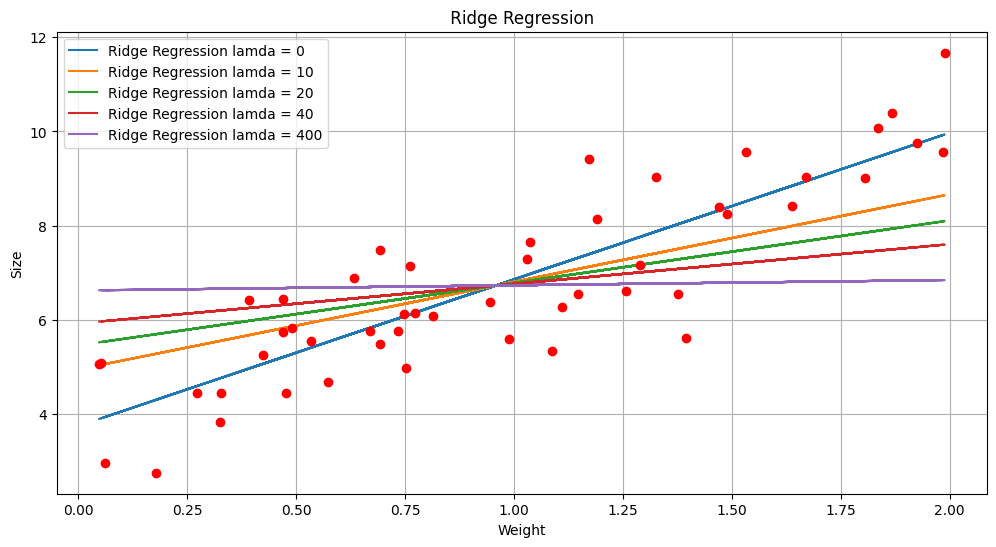

In [112]:
# Ridge (Ridge Regression) and values of lamda
lamda_value = [0, 10, 20, 40, 400]
#lamdas = [0]
#colors = ['blue', 'orange', 'purple', 'green', 'black']
#colors = ['blue']
#labels = [f'(lamda={lamda})' for lamda in lamdas]

plt.figure(figsize=(12, 6))

for lamda in lamda_value: 
    ridge_reg = Ridge(alpha=lamda)
    # parameter 'alpha' เป็นพารามิเตอร์ สำหรับการควบคุมไม่ให้โมเดลเกิดการ overfit
    #ในที่นี้ parameter ของ alpha จะใช้ค่าภายใน lamda
    ridge_reg.fit(weight, size)
    ridge_fit = ridge_reg.predict(weight)
    
    plt.plot(weight, ridge_fit,  
             label=f'Ridge Regression lamda = {lamda}')
    

#plt.plot(weight, linear_fit, color='red', 
#         label=f'Linear Regression\nresiduals = {linear_residuals:.2f}')

# training set
plt.scatter(weight, size, color='red', zorder=5)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.title(' Ridge Regression ')
plt.grid(True)


plt.show()
    

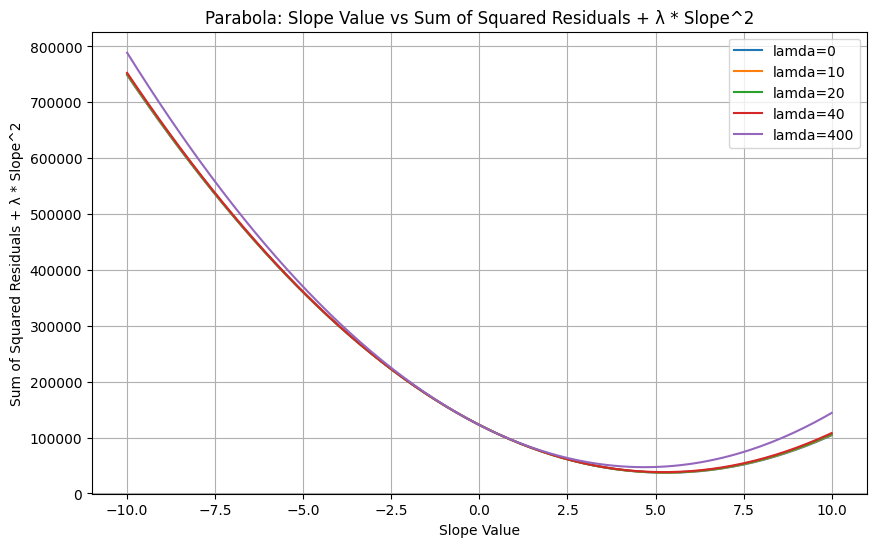

In [113]:
# สร้างค่า slope ที่ต้องการทดลอง
slopes = np.linspace(-10, 10.0, 200)

plt.figure(figsize=(10, 6))

# คำนวณ Sum of Squared Residuals + λ * Slope^2 สำหรับแต่ละ lamda และแต่ละ slope
for lamda in lamda_value:
    total_costs = []
    for slope in slopes:
        predictions = slope * weight.flatten()
        residuals = np.sum((size - predictions) ** 2)
        penalty = lamda * slope**2
        total_cost = residuals + penalty
        total_costs.append(total_cost)
    
    # พล็อตกราฟ Parabola ระหว่าง slope กับ (Sum of Squared Residuals + λ * Slope^2)
    plt.plot(slopes, total_costs,  label=f'lamda={lamda}')



plt.xlabel('Slope Value')
plt.ylabel('Sum of Squared Residuals + λ * Slope^2')
plt.title('Parabola: Slope Value vs Sum of Squared Residuals + λ * Slope^2')
plt.grid(True)
plt.legend()
plt.show()